##Albumentation Data Generate

Data Information
<br/>File I/O
<br/>Albumentation
<br/>Data Split/Merge

#Development Environment

In [ ]:
!pip install -U albumentations

In [ ]:
!pip install PyPDF2

In [ ]:
import albumentations as A
import cv2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
import random
import shutil
from glob import glob

In [ ]:
from termcolor import colored
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
from IPython.display import HTML
from IPython.display import Image
from PyPDF2 import PdfFileReader, PdfFileMerger
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Data Information

In [ ]:
train_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_train_ship_color.csv')
train_vehicle_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_train_vehicle_color.csv')
train_vehicle_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_train_vehicle_ship_color.csv')

In [ ]:
validation_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_validation_ship_color.csv')
validation_vehicle_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_validation_vehicle_color.csv')
validation_vehicle_ship_color_df = pd.read_csv('/content/drive/MyDrive/Aiffelthon/data_augmentation/file_list/sampling_validation_vehicle_ship_color.csv')

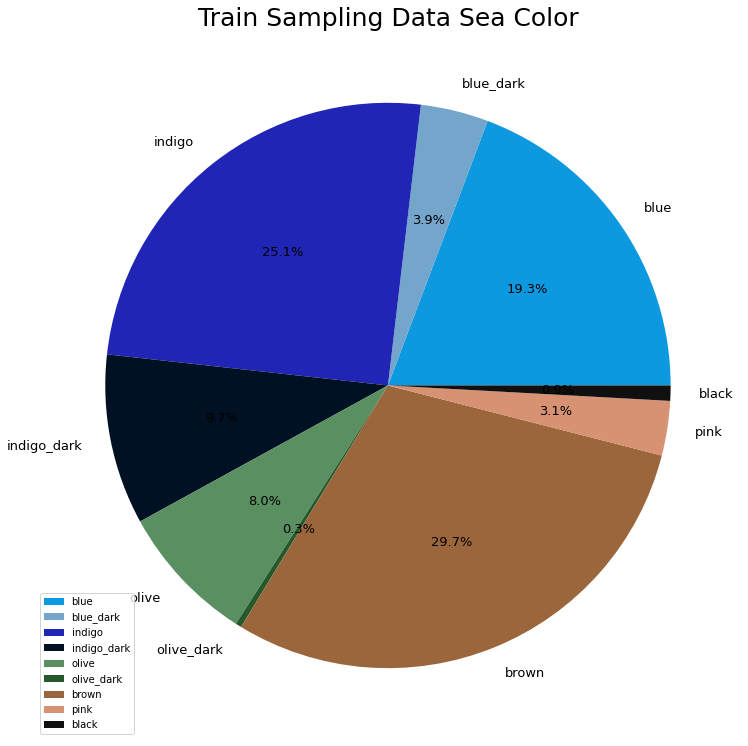

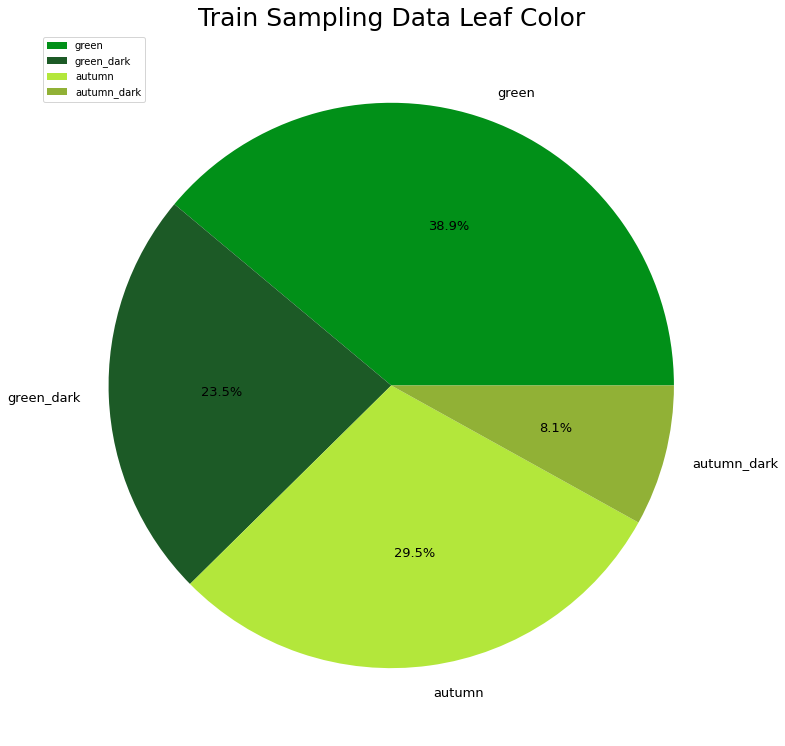

In [ ]:
train_blue = (len(train_ship_color_df['blue']) - sum(pd.isnull(train_ship_color_df['blue']))) \
+ (len(train_vehicle_ship_color_df['blue']) - sum(pd.isnull(train_vehicle_ship_color_df['blue'])))
train_blue_dark = (len(train_ship_color_df['blue_dark']) - sum(pd.isnull(train_ship_color_df['blue_dark']))) \
+ (len(train_vehicle_ship_color_df['blue_dark']) - sum(pd.isnull(train_vehicle_ship_color_df['blue_dark'])))
train_indigo = (len(train_ship_color_df['indigo']) - sum(pd.isnull(train_ship_color_df['indigo']))) \
+ (len(train_vehicle_ship_color_df['indigo']) - sum(pd.isnull(train_vehicle_ship_color_df['indigo'])))
train_indigo_dark = (len(train_ship_color_df['indigo_dark']) - sum(pd.isnull(train_ship_color_df['indigo_dark']))) \
+ (len(train_vehicle_ship_color_df['indigo_dark']) - sum(pd.isnull(train_vehicle_ship_color_df['indigo_dark'])))
train_olive = (len(train_ship_color_df['olive']) - sum(pd.isnull(train_ship_color_df['olive']))) \
+ (len(train_vehicle_ship_color_df['olive']) - sum(pd.isnull(train_vehicle_ship_color_df['olive'])))
train_olive_dark = (len(train_ship_color_df['olive_dark']) - sum(pd.isnull(train_ship_color_df['olive_dark']))) \
+ (len(train_vehicle_ship_color_df['olive_dark']) - sum(pd.isnull(train_vehicle_ship_color_df['olive_dark'])))
train_brown = len(train_ship_color_df['brown']) - sum(pd.isnull(train_ship_color_df['brown']))
train_pink = len(train_ship_color_df['pink']) - sum(pd.isnull(train_ship_color_df['pink']))
train_black = len(train_ship_color_df['black']) - sum(pd.isnull(train_ship_color_df['black']))

sea_color = ['blue', 'blue_dark', 'indigo', 'indigo_dark',
             'olive', 'olive_dark', 'brown', 'pink', 'black']
values = [train_blue, train_blue_dark, train_indigo, train_indigo_dark,
          train_olive, train_olive_dark, train_brown, train_pink, train_black]

chart_color = ["#0D99DF", "#74A5CA", "#2125B5", "#021023",
               "#5A9061", "#24592C", "#9B663B", "#D79173", "#101010"]

plt.figure(figsize=(13, 13))
plt.title("Train Sampling Data Sea Color", size=25)
plt.pie(values, autopct='%.1f%%', labels=sea_color, colors=chart_color, textprops={'fontsize': 13})
plt.legend(sea_color)
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_sampling_sea_color_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

print("\n" * 2)

train_green = len(train_vehicle_color_df['green']) - sum(pd.isnull(train_vehicle_color_df['green'])) \
+ (len(train_vehicle_ship_color_df['green']) - sum(pd.isnull(train_vehicle_ship_color_df['green'])))
train_green_dark = len(train_vehicle_color_df['green_dark']) - sum(pd.isnull(train_vehicle_color_df['green_dark'])) \
+ (len(train_vehicle_ship_color_df['green_dark']) - sum(pd.isnull(train_vehicle_ship_color_df['green_dark'])))
train_autumn = len(train_vehicle_color_df['autumn']) - sum(pd.isnull(train_vehicle_color_df['autumn'])) \
+ (len(train_vehicle_ship_color_df['autumn']) - sum(pd.isnull(train_vehicle_ship_color_df['autumn'])))
train_autumn_dark = len(train_vehicle_color_df['autumn_dark']) - sum(pd.isnull(train_vehicle_color_df['autumn_dark'])) \
+ (len(train_vehicle_ship_color_df['autumn_dark']) - sum(pd.isnull(train_vehicle_ship_color_df['autumn_dark'])))

leaf_color = ['green', 'green_dark', 'autumn', 'autumn_dark']
values = [train_green, train_green_dark, train_autumn, train_autumn_dark]

chart_color = ["#019018", "#1C5A26", "#B3E73B", "#91B136"]
plt.figure(figsize=(13, 13))
plt.title("Train Sampling Data Leaf Color", size=25)
plt.pie(values, autopct='%.1f%%', labels=leaf_color, colors=chart_color, textprops={'fontsize': 13})
plt.legend(leaf_color)
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/train_sampling_leaf_color_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

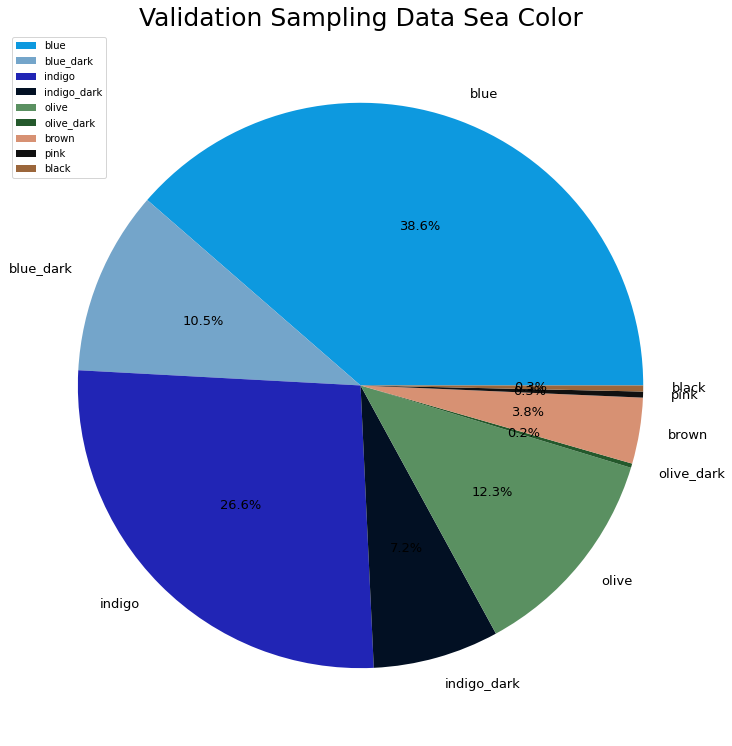

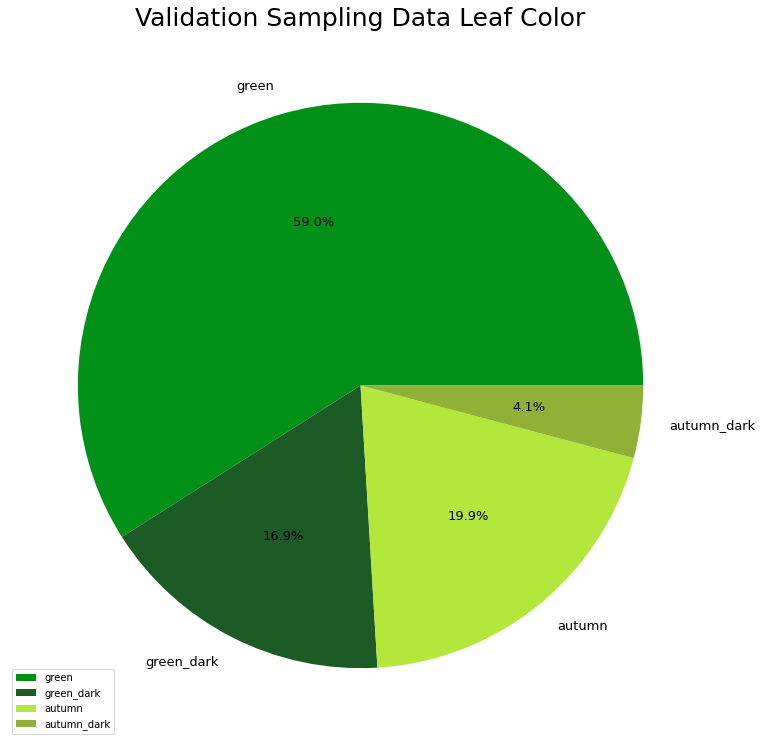

In [ ]:
validation_blue = (len(validation_ship_color_df['blue']) - sum(pd.isnull(validation_ship_color_df['blue']))) \
+ (len(validation_vehicle_ship_color_df['blue']) - sum(pd.isnull(validation_vehicle_ship_color_df['blue'])))
validation_blue_dark = (len(validation_ship_color_df['blue_dark']) - sum(pd.isnull(validation_ship_color_df['blue_dark']))) 
validation_indigo = (len(validation_ship_color_df['indigo']) - sum(pd.isnull(validation_ship_color_df['indigo']))) \
+ (len(validation_vehicle_ship_color_df['indigo']) - sum(pd.isnull(validation_vehicle_ship_color_df['indigo'])))
validation_indigo_dark = (len(validation_ship_color_df['indigo_dark']) - sum(pd.isnull(validation_ship_color_df['indigo_dark']))) \
+ (len(validation_vehicle_ship_color_df['indigo_dark']) - sum(pd.isnull(validation_vehicle_ship_color_df['indigo_dark'])))
validation_olive = (len(validation_ship_color_df['olive']) - sum(pd.isnull(validation_ship_color_df['olive'])))
validation_olive_dark = (len(validation_ship_color_df['olive_dark']) - sum(pd.isnull(validation_ship_color_df['olive_dark'])))
validation_brown = len(validation_ship_color_df['brown']) - sum(pd.isnull(validation_ship_color_df['brown']))
validation_pink = len(validation_ship_color_df['pink']) - sum(pd.isnull(validation_ship_color_df['pink']))
validation_black = len(validation_ship_color_df['black']) - sum(pd.isnull(validation_ship_color_df['black']))

sea_color = ['blue', 'blue_dark', 'indigo', 'indigo_dark',
             'olive', 'olive_dark', 'brown', 'pink', 'black']
values = [validation_blue, validation_blue_dark, validation_indigo, validation_indigo_dark,
          validation_olive, validation_olive_dark, validation_brown, validation_pink, validation_black]

chart_color = ["#0D99DF", "#74A5CA", "#2125B5", "#021023",
               "#5A9061", "#24592C", "#D79173", "#101010", "#9B663B"]

plt.figure(figsize=(13, 13))
plt.title("Validation Sampling Data Sea Color", size=25)
plt.pie(values, autopct='%.1f%%', labels=sea_color, colors=chart_color, textprops={'fontsize': 13})
plt.legend(sea_color)
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_sampling_sea_color_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

print("\n" * 2)

validation_green = len(validation_vehicle_color_df['green']) - sum(pd.isnull(validation_vehicle_color_df['green'])) \
+ (len(validation_vehicle_ship_color_df['green']) - sum(pd.isnull(validation_vehicle_ship_color_df['green'])))
validation_green_dark = len(validation_vehicle_color_df['green_dark']) - sum(pd.isnull(validation_vehicle_color_df['green_dark'])) \
+ (len(validation_vehicle_ship_color_df['green_dark']) - sum(pd.isnull(validation_vehicle_ship_color_df['green_dark'])))
validation_autumn = len(validation_vehicle_color_df['autumn']) - sum(pd.isnull(validation_vehicle_color_df['autumn'])) \
+ (len(validation_vehicle_ship_color_df['autumn']) - sum(pd.isnull(validation_vehicle_ship_color_df['autumn'])))
validation_autumn_dark = len(validation_vehicle_color_df['autumn_dark']) - sum(pd.isnull(validation_vehicle_color_df['autumn_dark'])) \
+ (len(validation_vehicle_ship_color_df['autumn_dark']) - sum(pd.isnull(validation_vehicle_ship_color_df['autumn_dark'])))

leaf_color = ['green', 'green_dark', 'autumn', 'autumn_dark']
values = [validation_green, validation_green_dark, validation_autumn, validation_autumn_dark]

chart_color = ["#019018", "#1C5A26", "#B3E73B", "#91B136"]
plt.figure(figsize=(13, 13))
plt.title("Validation Sampling Data Leaf Color", size=25)
plt.pie(values, autopct='%.1f%%', labels=leaf_color, colors=chart_color, textprops={'fontsize': 13})
plt.legend(leaf_color)
plt.savefig('/content/drive/MyDrive/Aiffelthon/data_augmentation/graph/validation_sampling_leaf_color_graph.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

In [ ]:
print(colored("Train Data", attrs=['bold']))
print("Blue:", train_blue) 
print("Blue Dark:", train_blue_dark) 
print("Indigo:", train_indigo) 
print("Indigo Dark:", train_indigo_dark) 
print("Olive:", train_olive)
print("Olive Dark:", train_olive_dark) 
print("Black:", train_black)
print("Brown:", train_brown)
print("Pink:", train_pink)
print("Green:", train_green)
print("Green Dark:", train_green_dark)
print("Autumn:", train_autumn)
print("Autumn Dark:", train_autumn_dark)
print("\n")

print(colored("Validation Data", attrs=['bold']))
print("Blue:", validation_blue) 
print("Blue Dark:", validation_blue_dark) 
print("Indigo:", validation_indigo) 
print("Indigo Dark:", validation_indigo_dark) 
print("Olive:", validation_olive)
print("Olive Dark:", validation_olive_dark) 
print("Black:", validation_black)
print("Brown:", validation_brown)
print("Pink:", validation_pink)
print("Green:", validation_green)
print("Green Dark:", validation_green_dark)
print("Autumn:", validation_autumn)
print("Autumn Dark:", validation_autumn_dark)

Train Data
Blue: 686
Blue Dark: 138
Indigo: 894
Indigo Dark: 347
Olive: 284
Olive Dark: 12
Black: 31
Brown: 1058
Pink: 111
Green: 1570
Green Dark: 947
Autumn: 1192
Autumn Dark: 325


Validation Data
Blue: 788
Blue Dark: 215
Indigo: 543
Indigo Dark: 147
Olive: 252
Olive Dark: 5
Black: 7
Brown: 77
Pink: 7
Green: 1055
Green Dark: 303
Autumn: 356
Autumn Dark: 74


In [ ]:
print("Train Data Size:", train_blue + train_olive + train_green)
print("Validation Data Size:", validation_blue + validation_olive + validation_green)

Train Data Size: 2540
Validation Data Size: 2095


#Train Data

##File I/O

In [ ]:
def make_tif_txt_path(difference_df, intersection_df, color, sampling_tif_folder, sampling_txt_folder, copy_tif_folder, copy_txt_folder):

  class_color_tif = list(difference_df[color].dropna()) + list(intersection_df[color].dropna())
  class_color_tif = sorted(class_color_tif, reverse=False)
  class_color_tif = sorted(class_color_tif, key=len)

  class_color_txt = []
  for tif_name in class_color_tif:
    txt_name = tif_name.replace('tif', 'txt')
    class_color_txt.append(txt_name)

  load_class_color_tif_path = []
  save_class_color_tif_path = []
  for tif_file in class_color_tif:
    load_tif_path = sampling_tif_folder + tif_file
    load_class_color_tif_path.append(load_tif_path)

    tif_split = tif_file.split('.')
    save_tif_path = copy_tif_folder + tif_split[0] + '_albu.' + tif_split[1]
    save_class_color_tif_path.append(save_tif_path)

  load_class_color_txt_path = []
  save_class_color_txt_path = []
  for txt_file in class_color_txt:
    load_txt_path = sampling_txt_folder + txt_file
    load_class_color_txt_path.append(load_txt_path)

    txt_split = txt_file.split('.')
    save_txt_path = copy_txt_folder + txt_split[0] + '_albu.' + txt_split[1]
    save_class_color_txt_path.append(save_txt_path)

  return class_color_tif, load_class_color_tif_path, save_class_color_tif_path, \
  class_color_txt, load_class_color_txt_path, save_class_color_txt_path

In [ ]:
sampling_data_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/'
copy_train_tif_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train_albu/'
copy_train_txt_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/train_super_albu/'

train_ship_blue_tif, load_train_ship_blue_tif_path, save_train_ship_blue_tif_path, \
train_ship_blue_txt, load_train_ship_blue_txt_path, save_train_ship_blue_txt_path \
= make_tif_txt_path(train_ship_color_df, train_vehicle_ship_color_df,
                    'blue', sampling_data_folder + 'images_train/', sampling_data_folder + 'train_super/',
                    copy_train_tif_folder, copy_train_txt_folder)

train_ship_olive_tif, load_train_ship_olive_tif_path, save_train_ship_olive_tif_path, \
train_ship_olive_txt, load_train_ship_olive_txt_path, save_train_ship_olive_txt_path \
= make_tif_txt_path(train_ship_color_df, train_vehicle_ship_color_df,
                    'olive', sampling_data_folder + 'images_train/', sampling_data_folder + 'train_super/',
                    copy_train_tif_folder, copy_train_txt_folder)

train_vehicle_green_tif, load_train_vehicle_green_tif_path, save_train_vehicle_green_tif_path, \
train_vehicle_green_txt, load_train_vehicle_green_txt_path, save_train_vehicle_green_txt_path \
= make_tif_txt_path(train_vehicle_color_df, train_vehicle_ship_color_df,
                    'green', sampling_data_folder + 'images_train/', sampling_data_folder + 'train_super/',
                    copy_train_tif_folder, copy_train_txt_folder)

In [ ]:
print("", train_ship_blue_tif[0], "\n", load_train_ship_blue_tif_path[0], "\n", save_train_ship_blue_tif_path[0], "\n",
      train_ship_blue_txt[0], "\n", load_train_ship_blue_txt_path[0]," \n", save_train_ship_blue_txt_path[0])

 6.tif 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train/6.tif 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train_albu/6_albu.tif 
 6.txt 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/train_super/6.txt  
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/train_super_albu/6_albu.txt


##Albumentation

[Albumentations](https://albumentations.ai/docs/)
<br/>[Image augmentation for classification](https://albumentations.ai/docs/getting_started/image_augmentation/)
<br/>[albumentation을 이용한 이미지 augmentation](https://gaussian37.github.io/dl-pytorch-albumentation/)
<br/>[HueSaturationValue](https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.HueSaturationValue)
<br/>[ChannelShuffle](https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.ChannelShuffle)
<br/>[CLAHE](https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.CLAHE)
<br/>[RandomBrightnessContrast](https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.RandomBrightnessContrast)
<br/>[Albu Example](https://github.com/open-mmlab/mmdetection/blob/master/configs/albu_example/mask_rcnn_r50_fpn_albu_1x_coco.py)

In [ ]:
def transfrom_base(image, transform_way):
  transform = A.Compose([
      transform_way,
  ])
  transforam_image = transform(image=image)['image']
  return transforam_image

In [ ]:
def transform_data(image, color):

  if color == 'blue':
    transform_way = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=[-0.1, 0.0], brightness_by_max=True, always_apply=False, p=1),
    A.Blur(blur_limit=[1, 4], always_apply=False, p=2),
    A.HueSaturationValue(hue_shift_limit=[-10, 10], sat_shift_limit=[-20, 20], val_shift_limit=[-20, 20], always_apply=False, p=0.3),
    ], p=1)

  if color == 'olive':
    transform_way = A.Compose([
    A.Blur(blur_limit=[1, 4], always_apply=False, p=2),
    A.HueSaturationValue(hue_shift_limit=[-10, 25], sat_shift_limit=[-20, 20], val_shift_limit=[-20, 20], always_apply=False, p=0.3),
    ], p=1)

  if color == 'green':
    transform_way = A.Compose([
    A.Blur(blur_limit=[1, 4], always_apply=False, p=2),
    A.HueSaturationValue(hue_shift_limit=[-60, 40], sat_shift_limit=[-20, 20], val_shift_limit=[-20, 20], always_apply=False, p=0.3),
    ], p=1)

  transform_image = transfrom_base(image, transform_way)

  return transform_image

In [ ]:
def augmentation_image_generate(load_tif_path, save_tif_path, color):
  for load_tif, save_tif in zip(load_tif_path, save_tif_path):
    image = cv2.imread(load_tif)
    transform_image = transform_data(image, color)
    transformed_image = cv2.cvtColor(transform_image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(save_tif, transformed_image)

In [ ]:
def augmentation_txt_generate(load_txt_path, save_txt_path):
  for load_txt, save_txt in zip(load_txt_path, save_txt_path):
    source = load_txt
    destination = save_txt
    shutil.copy(source, destination)

In [ ]:
augmentation_image_generate(load_train_ship_blue_tif_path, save_train_ship_blue_tif_path, 'blue')
augmentation_txt_generate(load_train_ship_blue_txt_path,  save_train_ship_blue_txt_path)

augmentation_image_generate(load_train_ship_olive_tif_path, save_train_ship_olive_tif_path, 'olive')
augmentation_txt_generate(load_train_ship_olive_txt_path,  save_train_ship_olive_txt_path)

augmentation_image_generate(load_train_vehicle_green_tif_path, save_train_vehicle_green_tif_path, 'green')
augmentation_txt_generate(load_train_vehicle_green_txt_path,  save_train_vehicle_green_txt_path)

#Validation Data

##File I/O

In [ ]:
sampling_data_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/'
copy_validation_tif_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_val_albu/'
copy_validation_txt_folder = '/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/val_super_albu/'

validation_ship_blue_tif, load_validation_ship_blue_tif_path, save_validation_ship_blue_tif_path, \
validation_ship_blue_txt, load_validation_ship_blue_txt_path, save_validation_ship_blue_txt_path \
= make_tif_txt_path(validation_ship_color_df, validation_vehicle_ship_color_df,
                    'blue', sampling_data_folder + 'images_val/', sampling_data_folder + 'val_super/',
                    copy_validation_tif_folder, copy_validation_txt_folder)

validation_ship_olive_tif, load_validation_ship_olive_tif_path, save_validation_ship_olive_tif_path, \
validation_ship_olive_txt, load_validation_ship_olive_txt_path, save_validation_ship_olive_txt_path \
= make_tif_txt_path(validation_ship_color_df, validation_vehicle_ship_color_df,
                    'olive', sampling_data_folder + 'images_val/', sampling_data_folder + 'val_super/',
                    copy_validation_tif_folder, copy_validation_txt_folder)

validation_vehicle_green_tif, load_validation_vehicle_green_tif_path, save_validation_vehicle_green_tif_path, \
validation_vehicle_green_txt, load_validation_vehicle_green_txt_path, save_validation_vehicle_green_txt_path \
= make_tif_txt_path(validation_vehicle_color_df, validation_vehicle_ship_color_df,
                    'green', sampling_data_folder + 'images_val/', sampling_data_folder + 'val_super/',
                    copy_validation_tif_folder, copy_validation_txt_folder)

In [ ]:
print("", validation_ship_blue_tif[0], "\n", load_validation_ship_blue_tif_path[0], "\n", save_validation_ship_blue_tif_path[0], "\n",
      validation_ship_blue_txt[0], "\n", load_validation_ship_blue_txt_path[0]," \n", save_validation_ship_blue_txt_path[0])

 0.tif 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_val/0.tif 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_val_albu/0_albu.tif 
 0.txt 
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/val_super/0.txt  
 /content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/val_super_albu/0_albu.txt


##Albumentation

In [ ]:
augmentation_image_generate(load_validation_ship_blue_tif_path, save_validation_ship_blue_tif_path, 'blue')
augmentation_txt_generate(load_validation_ship_blue_txt_path,  save_validation_ship_blue_txt_path)

augmentation_image_generate(load_validation_ship_olive_tif_path, save_validation_ship_olive_tif_path, 'olive')
augmentation_txt_generate(load_validation_ship_olive_txt_path,  save_validation_ship_olive_txt_path)

augmentation_image_generate(load_validation_vehicle_green_tif_path, save_validation_vehicle_green_tif_path, 'green')
augmentation_txt_generate(load_validation_vehicle_green_txt_path,  save_validation_vehicle_green_txt_path)

#Data Split/Merge

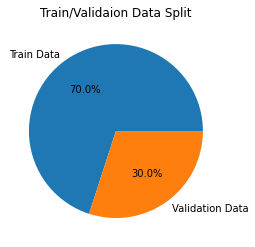



Data Size: 4635
Train Data Size: 3284
Validation Data Size: 1351
Data Proportion: 0.7 : 0.3


In [ ]:
albu_train_data_size = len(glob('/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train_albu/' + '*tif'))
albu_val_data_size = len(glob('/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_val_albu/' + '*tif'))
total_data_size = albu_train_data_size + albu_val_data_size
train_data_split_size = albu_train_data_size + 744
val_data_split_size = albu_val_data_size - 744
train_split_proportion = round(train_data_split_size / total_data_size, 1)
val_split_proportion = round(val_data_split_size / total_data_size, 1)

ratio = [train_split_proportion, val_split_proportion]
labels = ['Train Data', 'Validation Data']
plt.title("Train/Validaion Data Split")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()
print("\n")
print("Data Size:", total_data_size)
print("Train Data Size:", train_data_split_size)
print("Validation Data Size:", val_data_split_size)
print("Data Proportion:", train_split_proportion, ":", val_split_proportion)

In [ ]:
load_train_green1_tif_path = save_train_vehicle_green_tif_path
load_train_green2_tif_path = random.sample(save_validation_vehicle_green_tif_path, 352)
load_val_green = list(set(save_validation_vehicle_green_tif_path) - set(load_train_green2_tif_path))
load_val_green = sorted(load_val_green, reverse=False)
load_val_green_tif_path = sorted(load_val_green, key=len)

load_train_green1_txt_path = []
load_train_green2_txt_path = []
load_val_green_txt_path = []
save_train_green1_tif_path = []
save_train_green2_tif_path = []
save_val_green_tif_path = []
save_train_green1_txt_path = []
save_train_green2_txt_path = []
save_val_green_txt_path = []

for i in load_train_green1_tif_path:
  load_train_green1_txt_path.append(i.replace('images_train_albu', 'train_super_albu').replace('tif', 'txt'))
  save_train_green1_tif_path.append(i.replace('images_train_albu', 'images_train'))
  save_train_green1_txt_path.append(i.replace('images_train_albu', 'train_super').replace('tif', 'txt'))

for i in load_train_green2_tif_path:
  load_train_green2_txt_path.append(i.replace('images_val_albu', 'val_super_albu').replace('tif', 'txt'))
  save_train_green2_tif_path.append(i.replace('images_val_albu', 'images_train'))
  save_train_green2_txt_path.append(i.replace('images_val_albu', 'train_super').replace('tif', 'txt'))

for  j in load_val_green_tif_path:
  load_val_green_txt_path.append(j.replace('images_val_albu', 'val_super_albu').replace('tif', 'txt'))
  save_val_green_tif_path.append(j.replace('images_val_albu', 'images_val'))
  save_val_green_txt_path.append(j.replace('images_val_albu', 'val_super').replace('tif', 'txt'))

In [ ]:
load_train_olive1_tif_path = save_train_ship_olive_tif_path
load_train_olive2_tif_path = random.sample(save_validation_ship_olive_tif_path, 84)
load_val_olive = list(set(save_validation_ship_olive_tif_path) - set(load_train_olive2_tif_path))
load_val_olive = sorted(load_val_olive, reverse=False)
load_val_olive_tif_path = sorted(load_val_olive, key=len)

load_train_olive1_txt_path = []
load_train_olive2_txt_path = []
load_val_olive_txt_path = []
save_train_olive1_tif_path = []
save_train_olive2_tif_path = []
save_val_olive_tif_path = []
save_train_olive1_txt_path = []
save_train_olive2_txt_path = []
save_val_olive_txt_path = []

for i in load_train_olive1_tif_path:
  load_train_olive1_txt_path.append(i.replace('images_train_albu', 'train_super_albu').replace('tif', 'txt'))
  save_train_olive1_tif_path.append(i.replace('images_train_albu', 'images_train'))
  save_train_olive1_txt_path.append(i.replace('images_train_albu', 'train_super').replace('tif', 'txt'))

for i in load_train_olive2_tif_path:
  load_train_olive2_txt_path.append(i.replace('images_val_albu', 'val_super_albu').replace('tif', 'txt'))
  save_train_olive2_tif_path.append(i.replace('images_val_albu', 'images_train'))
  save_train_olive2_txt_path.append(i.replace('images_val_albu', 'train_super').replace('tif', 'txt'))

for  j in load_val_olive_tif_path:
  load_val_olive_txt_path.append(j.replace('images_val_albu', 'val_super_albu').replace('tif', 'txt'))
  save_val_olive_tif_path.append(j.replace('images_val_albu', 'images_val'))
  save_val_olive_txt_path.append(j.replace('images_val_albu', 'val_super').replace('tif', 'txt'))

In [ ]:
load_train_blue1_tif_path = save_train_ship_blue_tif_path
load_train_blue2_tif_path = random.sample(save_validation_ship_blue_tif_path, 268)
load_val_blue = list(set(save_validation_ship_blue_tif_path) - set(load_train_blue2_tif_path))
load_val_blue = sorted(load_val_blue, reverse=False)
load_val_blue_tif_path = sorted(load_val_blue, key=len)

load_train_blue1_txt_path = []
load_train_blue2_txt_path = []
load_val_blue_txt_path = []
save_train_blue1_tif_path = []
save_train_blue2_tif_path = []
save_val_blue_tif_path = []
save_train_blue1_txt_path = []
save_train_blue2_txt_path = []
save_val_blue_txt_path = []

for i in load_train_blue1_tif_path:
  load_train_blue1_txt_path.append(i.replace('images_train_albu', 'train_super_albu').replace('tif', 'txt'))
  save_train_blue1_tif_path.append(i.replace('images_train_albu', 'images_train'))
  save_train_blue1_txt_path.append(i.replace('images_train_albu', 'train_super').replace('tif', 'txt'))

for i in load_train_blue2_tif_path:
  load_train_blue2_txt_path.append(i.replace('images_val_albu', 'val_super_albu').replace('tif', 'txt'))
  save_train_blue2_tif_path.append(i.replace('images_val_albu', 'images_train'))
  save_train_blue2_txt_path.append(i.replace('images_val_albu', 'train_super').replace('tif', 'txt'))

for  j in load_val_blue_tif_path:
  load_val_blue_txt_path.append(j.replace('images_val_albu', 'val_super_albu').replace('tif', 'txt'))
  save_val_blue_tif_path.append(j.replace('images_val_albu', 'images_val'))
  save_val_blue_txt_path.append(j.replace('images_val_albu', 'val_super').replace('tif', 'txt'))

In [ ]:
def file_copy(load_path, save_path):
  for load_file, save_file in zip(load_path, save_path):
    source = load_file
    destination = save_file
    shutil.copy(source, destination)

In [ ]:
file_copy(load_train_green1_tif_path, save_train_green1_tif_path)
file_copy(load_train_green1_txt_path, save_train_green1_txt_path)
file_copy(load_train_olive1_tif_path, save_train_olive1_tif_path)
file_copy(load_train_olive1_txt_path, save_train_olive1_txt_path)
file_copy(load_train_blue1_tif_path, save_train_blue1_tif_path)
file_copy(load_train_blue1_txt_path, save_train_blue1_txt_path)

In [ ]:
file_copy(load_train_green2_tif_path, save_train_green2_tif_path)
file_copy(load_train_green2_txt_path, save_train_green2_txt_path)
file_copy(load_train_olive2_tif_path, save_train_olive2_tif_path)
file_copy(load_train_olive2_txt_path, save_train_olive2_txt_path)
file_copy(load_train_blue2_tif_path, save_train_blue2_tif_path)
file_copy(load_train_blue2_txt_path, save_train_blue2_txt_path)

In [ ]:
file_copy(load_val_green_tif_path, save_val_green_tif_path)
file_copy(load_val_green_txt_path, save_val_green_txt_path)
file_copy(load_val_olive_tif_path, save_val_olive_tif_path)
file_copy(load_val_olive_txt_path, save_val_olive_txt_path)
file_copy(load_val_blue_tif_path, save_val_blue_tif_path)
file_copy(load_val_blue_txt_path, save_val_blue_txt_path)